In [1]:
from dotenv import load_dotenv
load_dotenv()

import os
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")

ModuleNotFoundError: No module named 'dotenv'

In [10]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="llama-3.3-70b-versatile")
llm.invoke("Hello, how are you?")


AIMessage(content="Hello. I'm just a language model, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to assist you with any questions or tasks you may have. How can I help you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 41, 'total_tokens': 89, 'completion_time': 0.115081724, 'completion_tokens_details': None, 'prompt_time': 0.001967145, 'prompt_tokens_details': None, 'queue_time': 0.056105855, 'total_time': 0.117048869}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_c06d5113ec', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bd971-2586-7bd0-b72c-52d96475fa50-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 41, 'output_tokens': 48, 'total_tokens': 89})

In [11]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages :Annotated[
        list[AnyMessage],
        add_messages  
    ]

In [12]:
def supberbot(state:State):
  return {"messages":[llm.invoke(state["messages"])]}

In [13]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

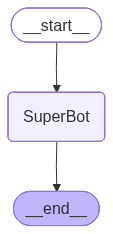

In [14]:
from IPython.display import display, JSON, Image
from langgraph.graph import END, StateGraph,START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

graph=StateGraph(State)

graph.add_node("SuperBot",supberbot)

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)

graph_builder = graph.compile(checkpointer=memory)

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [15]:
config  ={"configurable":{"thread_id":"1"}}
graph_builder.invoke({'messages':"Chào tên tôi là Giang và tôi thích đá bóng"}, config=config)

{'messages': [HumanMessage(content='Chào tên tôi là Giang và tôi thích đá bóng', additional_kwargs={}, response_metadata={}, id='8093c15b-eba2-40ad-b12b-5110b7603f72'),
  AIMessage(content='Chào Giang! Rất vui khi gặp bạn. Đá bóng là một môn thể thao tuyệt vời, không chỉ giúp cải thiện sức khỏe thể chất mà còn giúp rèn luyện tinh thần và kỹ năng làm việc nhóm. Bạn có đội bóng yêu thích hoặc cầu thủ idol không?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 59, 'prompt_tokens': 46, 'total_tokens': 105, 'completion_time': 0.236818448, 'completion_tokens_details': None, 'prompt_time': 0.004183778, 'prompt_tokens_details': None, 'queue_time': 0.056522191, 'total_time': 0.241002226}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_c06d5113ec', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bd971-298f-76b3-b3f4-4a34c8bfea4c-0', tool_calls=[], invalid_tool_calls=[], usage_met

In [19]:
config = {"configurable":{"thread_id":"2"}}

for chunk in graph_builder.stream({'messages':"Chào tên tôi là Giang và tôi thích đá bóng"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content='Chào Giang! Rất vui được gặp bạn. Đá bóng là một môn thể thao tuyệt vời, giúp bạn rèn luyện sức khỏe, cải thiện kỹ năng và tạo ra những trải nghiệm thú vị. Bạn có cầu thủ đá bóng yêu thích không, chẳng hạn như Ronaldo, Messi hay Neymar? Hay bạn có một đội bóng yêu thích mà bạn luôn theo dõi và ủng hộ?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 314, 'total_tokens': 396, 'completion_time': 0.190903906, 'completion_tokens_details': None, 'prompt_time': 0.016136488, 'prompt_tokens_details': None, 'queue_time': 0.055900422, 'total_time': 0.207040394}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_dae98b5ecb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bd974-9f9d-79f3-bfd6-f7f161a1b9ec-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 314, 'output_tokens': 82, 'total_tokens':

In [18]:

for chunk in graph_builder.stream({'messages':"Chào tên tôi là Giang và tôi thích đá bóng"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Chào tên tôi là Giang và tôi thích đá bóng', additional_kwargs={}, response_metadata={}, id='a990a00d-4cf5-4e34-9875-9e1cbb710abc'), AIMessage(content='Chào Giang! Rất vui được gặp bạn. Đá bóng là một môn thể thao tuyệt vời, không chỉ giúp cải thiện sức khỏe thể chất mà còn mang lại nhiều lợi ích về tinh thần và kỹ năng giao tiếp. Bạn có đội bóng yêu thích không? Hay có cầu thủ đá bóng nào mà bạn ngưỡng mộ?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 70, 'prompt_tokens': 46, 'total_tokens': 116, 'completion_time': 0.252879957, 'completion_tokens_details': None, 'prompt_time': 0.002447476, 'prompt_tokens_details': None, 'queue_time': 0.056144844, 'total_time': 0.255327433}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_68f543a7cc', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bd972-f26e-7cd0-a75f-cfe6c78ff970-0', tool_calls=[],